In [1]:
import pickle
import torch
import numpy as np
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# instructed method to import data
def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [3]:
# assigning to qmnist
qmnist = unpickle("../input/qmnist-the-extended-mnist-dataset-120k-images/MNIST-120k")

In [4]:
qmnist

{'data': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [5]:
# using to transform arrays to tensors
preprocessing = transforms.Compose([transforms.ToTensor()])

In [6]:
data = qmnist['data']
# make pixel values fall between 0 and 1
data = data/255
labels = qmnist['labels']
# want labels horizontally stacked
labels = labels.reshape(1,-1)
# applt tensor transformation
labels = preprocessing(labels)
# verifying array changed to tensor 
labels[0][0]

tensor([5, 0, 4,  ..., 5, 5, 4])

In [7]:
# putting feature and target into same array
dataset = [[data[index], [labels[0][0][index]]] for index in range(0, 119999)]
dataset[0]

[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [8]:
# manual train test split (test size of 0.2)
train_split = len(dataset)-len(dataset)/5
train = dataset[:int(train_split)]
test = dataset[int(train_split):]

In [9]:
train[10]

[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [10]:
# shuffling training set with a batch size of 10
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [11]:
trainset

In [12]:
int(labels[0][0][0])

5

In [13]:
# checking distribution of labels
total = 0
count = 0

dict_count = {x:0 for x in range(0, 10)}

for label in labels[0][0]:
    dict_count[int(label)] += 1
    total += 1
    
print(dict_count)

{0: 11875, 1: 13533, 2: 11984, 3: 12215, 4: 11622, 5: 10875, 6: 11875, 7: 12496, 8: 11741, 9: 11784}


In [14]:
# defining network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
net = Net().double()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
# using crossentropy as this is a classification problem
loss_function = nn.CrossEntropyLoss()
# setting learning rate and parameters through Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
# checking batch sizes worked
for data in trainset:
    print(data)
    break

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,

In [17]:
for epoch in range(3): # 3 epochs
    for data in trainset:
        X, y = data  # X: features, y: targets (in batches of 10)
        net.zero_grad()  # sets gradients to 0 before loss calc
        output = net(X.view(-1,28*28))  # pass in the reshaped batch
        loss = F.nll_loss(output, y[0])  # compare and calculate loss
        loss.backward()  # apply loss back through network
        optimizer.step()  # optimize weights with loss
    print(loss)

tensor(0.2295, dtype=torch.float64, grad_fn=<NllLossBackward>)
tensor(0.0201, dtype=torch.float64, grad_fn=<NllLossBackward>)
tensor(0.0716, dtype=torch.float64, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[0][idx]:
                correct += 1
            total += 1
            
print(f"Accuracy: {round(correct/total*100, 3)}")

Accuracy: 96.688


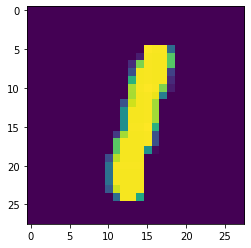

In [19]:
# running a prediction
plt.imshow(X[0].view(28, 28))
plt.show()

In [20]:
net(X[0].view(-1, 28*28))[0] #getting array of output values

tensor([-2.1712e+01, -2.2383e-05, -1.5158e+01, -2.0417e+01, -1.1416e+01,
        -1.9640e+01, -1.3368e+01, -1.2346e+01, -1.2245e+01, -1.4800e+01],
       dtype=torch.float64, grad_fn=<SelectBackward>)

In [21]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0])) #display index with greatest value

tensor(1)
